<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Ciência de Dados

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza

# DBSCAN

## 1. Leitura dos dados: (Municípios)

In [ ]:
!gdown --id 1qQ-KOL0hlLbAjOzmV4bA6JjyMsEOqw1z

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qQ-KOL0hlLbAjOzmV4bA6JjyMsEOqw1z
To: /content/municipios.csv
100% 389k/389k [00:00<00:00, 81.7MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('municipios.csv')

df.head()

,cd_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

X = df[['longitude', 'latitude']].to_numpy()

dbscan = DBSCAN(eps=0.4, min_samples=2)

lbl = dbscan.fit(X)

df['cluster'] = lbl.labels_

In [ ]:
lbl.labels_

array([0, 0, 0, ..., 1, 9, 1])

In [ ]:
print(len(X))

5570


In [ ]:
print(len(lbl.labels_))

5570


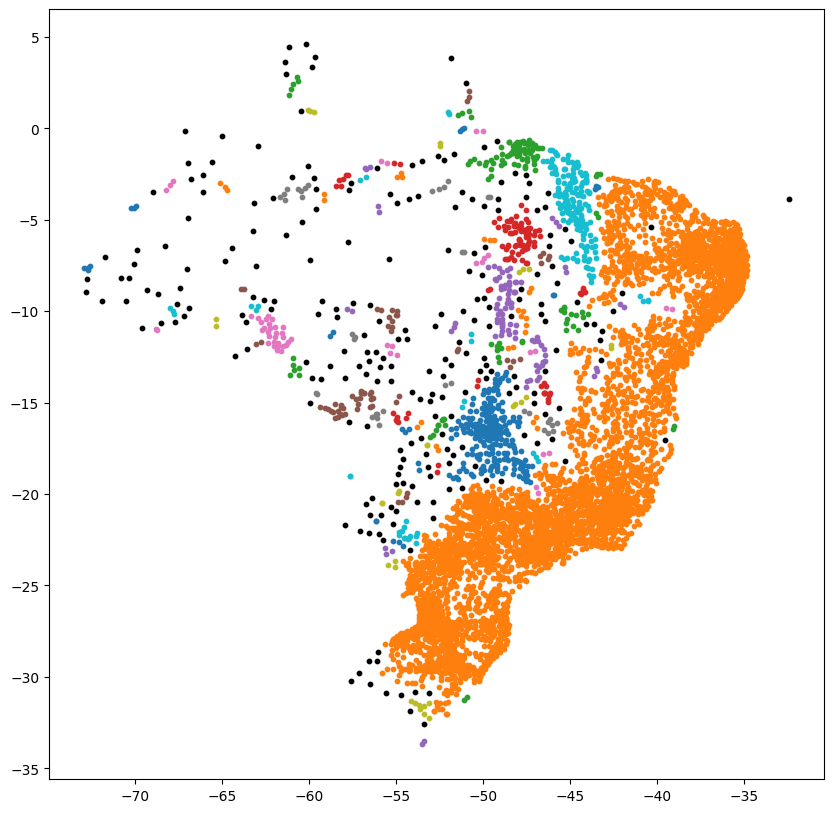

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for lbl in df['cluster'].unique():

  if lbl!=-1:

    c = df[df['cluster'] == lbl].copy()
    plt.scatter(c['longitude'], c['latitude'], s=10)

  else:

    c = df[df['cluster'] == lbl].copy()
    plt.scatter(c['longitude'], c['latitude'], s=10, c='black')

plt.show()

In [ ]:
print('Número de clusters:', len(df['cluster'].unique()) - 1)
print('Ruído:', len(df[df['cluster'] == -1]))

Número de clusters: 116
Ruído: 240


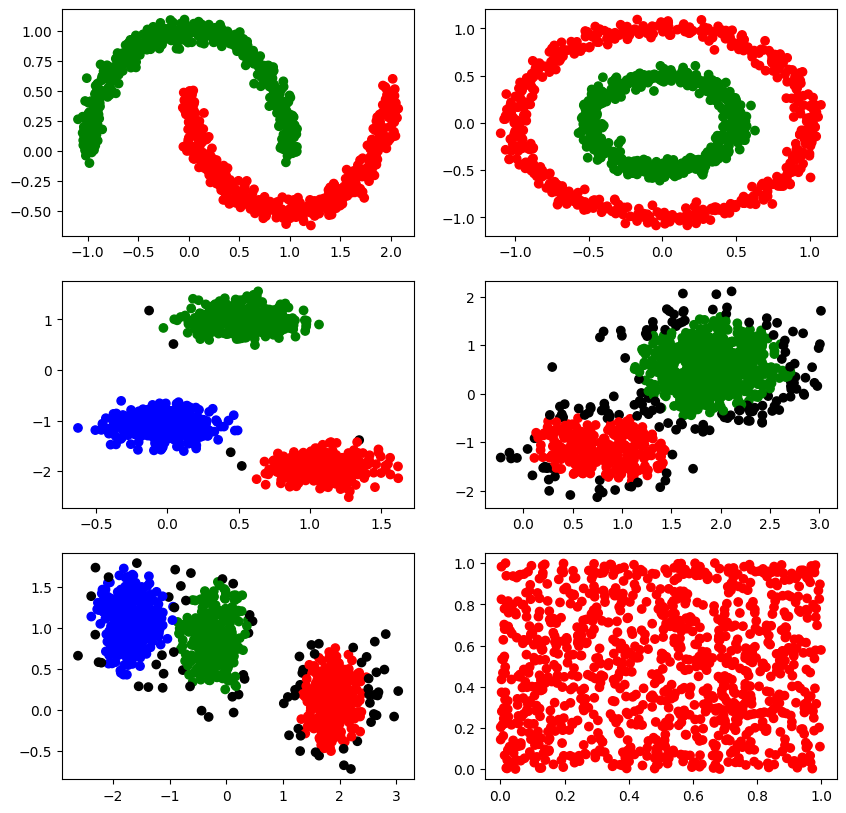

In [ ]:
from sklearn import cluster, datasets

n_samples = 1000
noisy_moons, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
noisy_circles, _ = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
blobs1, _ = datasets.make_blobs(n_samples=n_samples, random_state=10, center_box=(-2, 2),cluster_std=0.2)
blobs2, _ = datasets.make_blobs(n_samples=n_samples, random_state=4, center_box=(-2, 2),cluster_std=0.4)
blobs3, _ = datasets.make_blobs(n_samples=n_samples, random_state=7, center_box=(-2, 2),cluster_std=0.3)
no_structure, _ = np.random.rand(n_samples, 2), None

examples = [noisy_moons, noisy_circles, blobs1, blobs2, blobs3, no_structure]

from sklearn.cluster import DBSCAN

plt.figure(figsize=(10, 10))

colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
colours[4] = 'c'
colours[5] = 'm'
colours[6] = 'tab:pink'
colours[7] = 'tab:orange'
colours[8] = 'tab:olive'
colours[9] = 'tab:brown'
colours[-1] = 'k'

for num, i in enumerate(examples):

  db_default = DBSCAN(eps = 0.2, min_samples = 20).fit(i)

  labels = db_default.labels_

  cvec = [colours[label] for label in labels]

  plt.subplot(3, 2, num+1)

  plt.scatter(i[:, 0], i[:, 1], color = cvec)

plt.show()

## 2. Exemplo 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

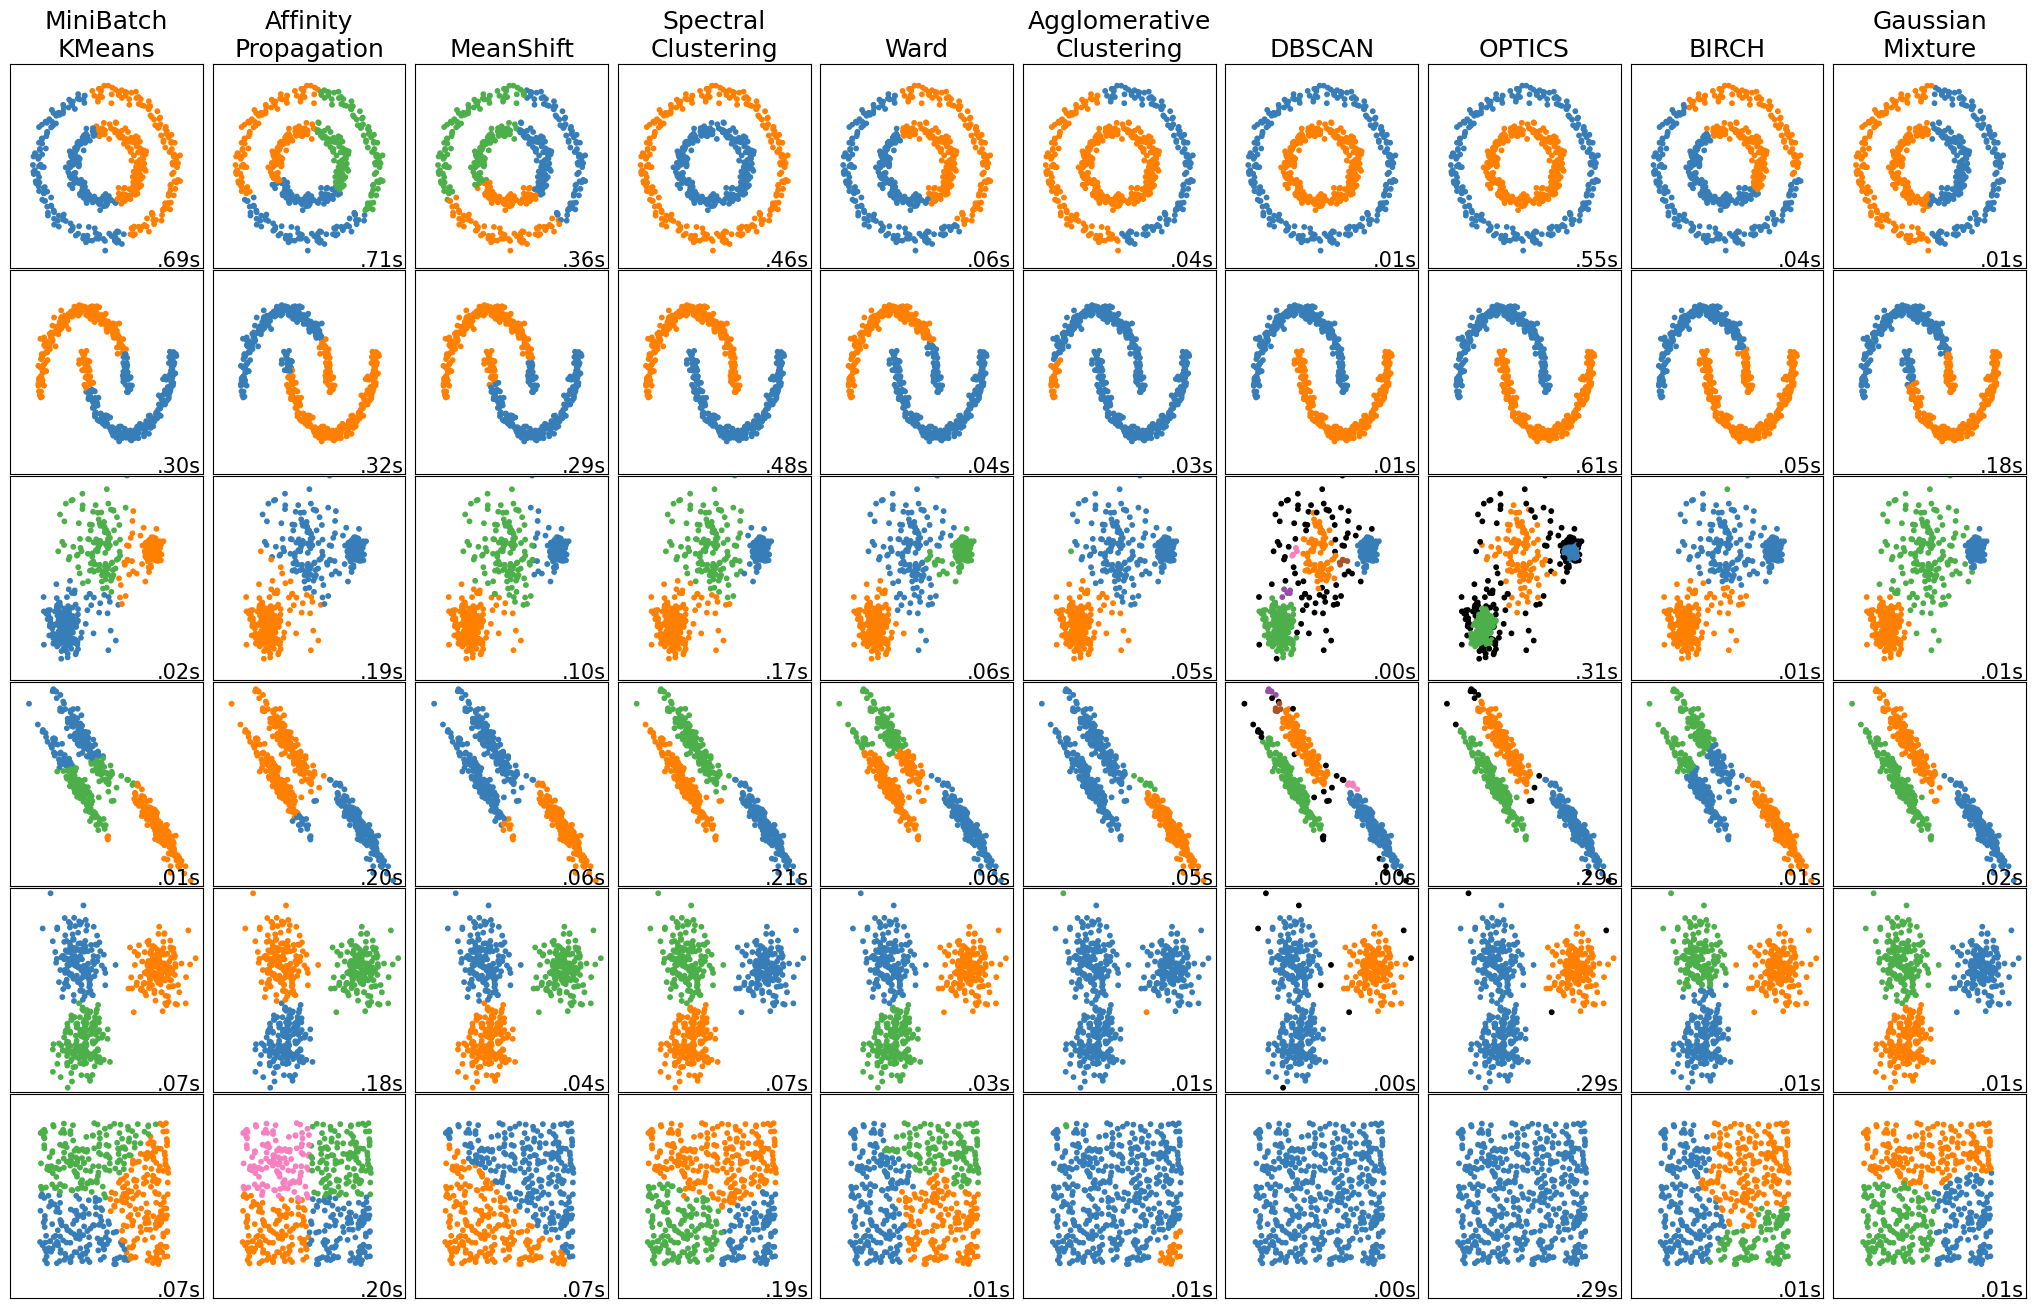

In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    # hdbscan = cluster.HDBSCAN(
    #     min_samples=params["hdbscan_min_samples"],
    #     min_cluster_size=params["hdbscan_min_cluster_size"],
    #     allow_single_cluster=params["allow_single_cluster"],
    # )
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        # ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()